In [ ]:
%pip install pHcalc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


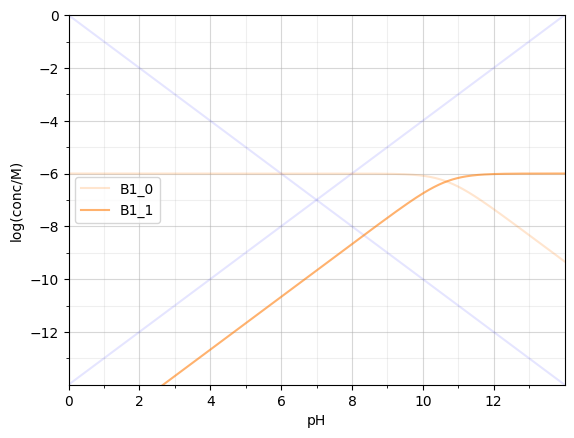

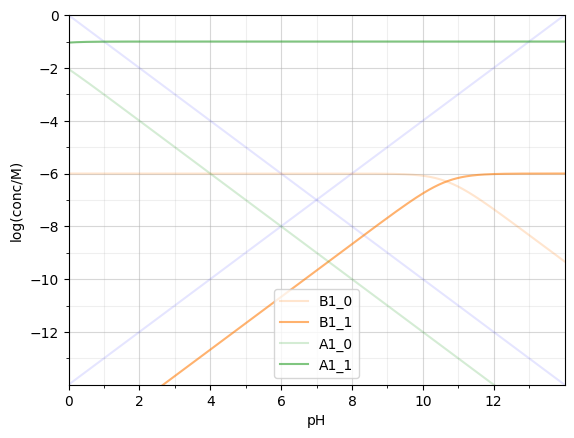

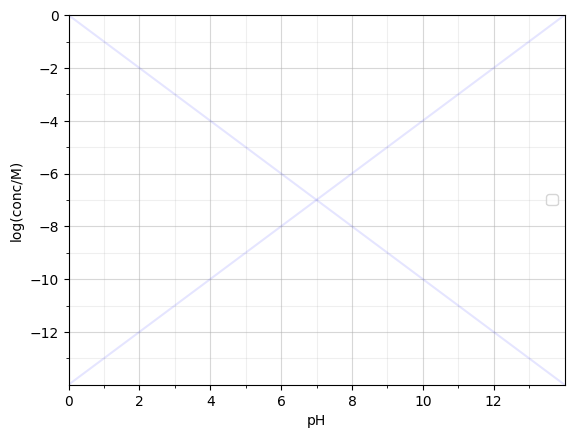

In [3]:
from pHhelpers import *
# sample acids/bases
Heptylamine = Acid(pKa=[10.67], charge = 1, conc=1e-6)
Carbonic_acid = Acid(pKa=[6.35, 10.33], charge = 0, conc=0.1)
Hydrochloric_acid = Acid(pKa=[-1], charge=0, conc=0.1)

# generate sillen diagram
#single acid/base
generate_sillen([Heptylamine],['B1'])

#multiple
generate_sillen([Heptylamine, Hydrochloric_acid],['B1','A1'])

#generate empty square:
generate_sillen([],[])
